# Table of contents:

* [Round 3](#round3) 
* [Round 4](#round4)
* [Round 5](#round5)
* [Round 6](#round6)
* [Round 7](#round7)

In [82]:
import pandas as pd

file1 = pd.read_csv("marketing_customer_analysis.csv")
file1


,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [83]:
# dataframe shape

file1 = file1.drop(["Unnamed: 0"], axis = 1)
file1.shape


(10910, 25)

In [84]:
# standardizing header names

cols_1 = []
for column in file1.columns:
    cols_1.append(column.lower())
file1.columns = cols_1

print(file1.columns)


Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size', 'vehicle type'],
      dtype='object')


In [85]:
# numerical columns

file1._get_numeric_data()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [86]:
# categorial columns

file1.select_dtypes("object")

,customer,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [87]:
# NaN values

file1.isna().sum()

customer                            0
state                             631
customer lifetime value             0
response                          631
coverage                            0
education                           0
effective to date                   0
employmentstatus                    0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           633
months since policy inception       0
number of open complaints         633
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size                      622
vehicle type                     5482
dtype: int64

In [88]:
# NaN values in %

round(file1.isna().sum()/len(file1),4)*100

customer                          0.00
state                             5.78
customer lifetime value           0.00
response                          5.78
coverage                          0.00
education                         0.00
effective to date                 0.00
employmentstatus                  0.00
gender                            0.00
income                            0.00
location code                     0.00
marital status                    0.00
monthly premium auto              0.00
months since last claim           5.80
months since policy inception     0.00
number of open complaints         5.80
number of policies                0.00
policy type                       0.00
policy                            0.00
renew offer type                  0.00
sales channel                     0.00
total claim amount                0.00
vehicle class                     5.70
vehicle size                      5.70
vehicle type                     50.25
dtype: float64

In [89]:
# dealing with NaN values

#file1[file1['vehicle type'].isna()==True].head(60) 
#file1["vehicle type"].unique() # values in column



In [90]:
# dropping state, response, months since last claim, number of open complaints, vehicle class, vehicle size
# they make only roughly 6 % of the data
# nachschauen wie man eine Spalte bzw. nur NaN-Werte dropt
file1 = file1[file1['state'].isna()==False]
file1 = file1[file1['response'].isna()==False]
file1 = file1[file1['months since last claim'].isna()==False]
file1 = file1[file1['number of open complaints'].isna()==False]
file1 = file1[file1['vehicle class'].isna()==False]
file1 = file1[file1['vehicle size'].isna()==False]

file1.isna().sum()

customer                            0
state                               0
customer lifetime value             0
response                            0
coverage                            0
education                           0
effective to date                   0
employmentstatus                    0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim             0
months since policy inception       0
number of open complaints           0
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                       0
vehicle size                        0
vehicle type                     4591
dtype: int64

In [91]:
# Replacing null values for categorical variables for vehicle type

#file1["vehicle type"].unique() # values in column
#file1['vehicle type'].value_counts(dropna=False) #zeigt alle werte + auftreten + NaN

file1['vehicle type'] = file1['vehicle type'].fillna('Z')

file1["vehicle type"].unique()

file1.isna().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
vehicle type                     0
dtype: int64

In [92]:
# datetime format_month: effective to date

file1['effective to date'] = pd.to_datetime(file1['effective to date'], errors='coerce')
#file1["effective to date"][len(file1['effective to date'])].month

# new column
file1['month'] = file1["effective to date"].dt.month_name()
#file1["month"].unique()

In [93]:
# filtering by month


file1[(file1["month"]=="January") | (file1["month"]=="February") | (file1["month"]=="March")]

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,Z,February
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,Z,January
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,Z,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A,January
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,February
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,January
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,Z,February


In [94]:
### Bonus: put everything in a function (from Asha)

def clean(file):
    file = file.drop(['Unnamed: 0'], axis=1) #1
    file['State'].value_counts(dropna=False) #2
    file['Vehicle Type'] = file['Vehicle Type'].fillna('not A') #4
    file['Vehicle Type'].value_counts(dropna=False) #5
    file = file[file['State'].isna()==False] #7
    file = file[file['Months Since Last Claim'].isna()==False] #8
    file = file[file['Vehicle Class'].isna()==False] #9
    file['Effective To Date'] = pd.to_datetime(file['Effective To Date']) #10
    file['Effective To Date Month'] = file['Effective To Date'].dt.month #11
    file[file['Effective To Date Month'].isin([1, 2, 3])] #12
    columns = [] #13
    for i in file.columns:
        columns.append(i.lower())
    file.columns = columns
    return file


# Start of round 3<a class="anchor" id="round3"></a>

In [95]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

sns.set_theme()
sns.set_style("white")



## showing my dataframe file1

In [96]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 10908
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer lifetime value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective to date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location code                  9134 non-null   object        
 11  marital status  

## describing my dataframe file1

In [97]:
file1.describe().T

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly premium auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months since last claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months since policy inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number of open complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number of policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total claim amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


## showing plot of the total number of responses

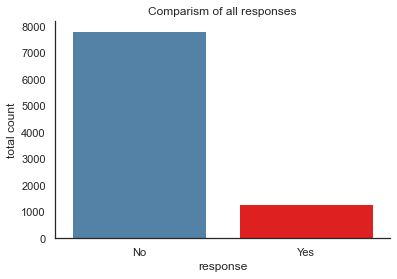

In [98]:
sns.countplot(x="response",
              data=file1, 
              palette=["steelblue","red"])

plt.title("Comparism of all responses")
sns.despine()
plt.ylabel("total count")
plt.show()

## plot of the response rate by the sales channel

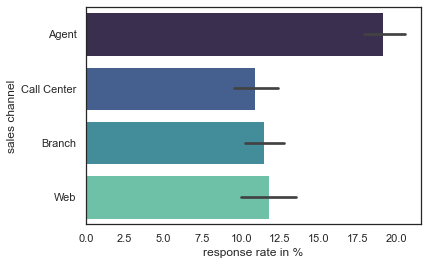

In [99]:
file1["response rate"] = file1["response"]=="Yes"
file1["response rate"] = list(map(int,file1["response rate"]*100))
#response_mean = file1["response rate"].mean()
#file1.head()
sns.barplot(data=file1,
            x="response rate",
            y="sales channel",
            palette="mako")

plt.xlabel("response rate in %")
plt.show()
#sns.countplot(x="response", hue="sales channel",data=file1,palette="mako")




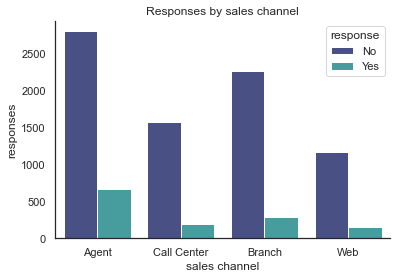

In [100]:
sns.countplot(data=file1,
              x="sales channel", 
              hue="response",
              palette="mako")

plt.title("Responses by sales channel")
plt.ylabel("responses")
sns.despine()
plt.show()

## Show a plot of the response rate by the total claim amount

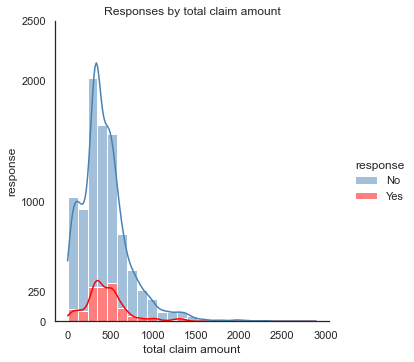

In [101]:
sns.set_style("white")
p=sns.displot(data = file1,
            x='total claim amount',
            bins =25, 
            kde =True, 
            hue='response',
            palette=["steelblue","red"],
            multiple="stack") 

p.set(yticks=[0,250,1000,2000,2500])
plt.ylim(0,2500)
plt.title("Responses by total claim amount")
plt.ylabel("response")
plt.show()

## Show a plot of the response rate by income

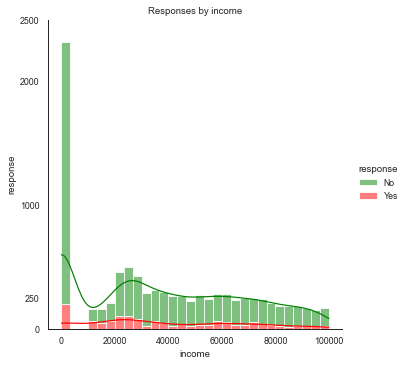

In [102]:
sns.set_context("paper")
p=sns.displot(data = file1,
              x="income", 
              hue="response", 
              bins=30,
              palette=["green","red"],
              multiple="stack",
              kde=True)

p.set(yticks=[0,250,1000,2000,2500])
plt.ylim(0,2500)
plt.title("Responses by income")
plt.ylabel("response")
plt.show()

# Start of round 4 <a class="anchor" id="round4"></a>

## Getting numerical data

In [103]:
# dropping response rate -> duplicate of response
file1 = file1.drop(["response rate"], axis =1)

In [104]:
numerical = file1.select_dtypes(np.number)
numerical

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
6,5035.035257,37405,63,8.0,99,3.0,4,287.556107
...,...,...,...,...,...,...,...,...
10903,2771.663013,59855,74,30.0,82,4.0,1,355.200000
10904,19228.463620,0,187,14.0,32,0.0,2,897.600000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996


## Getting categorial data

In [105]:
categoricals = file1.select_dtypes(np.object)
categoricals

,customer,state,response,coverage,education,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type,month
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,Z,February
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,Z,January
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A,February
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A,January
6,IW72280,California,No,Basic,Doctor,Employed,F,Urban,Married,Corporate Auto,Corporate L2,Offer2,Branch,Four-Door Car,Medsize,Z,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,No,Basic,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize,A,January
10904,QI63521,Nevada,No,Basic,High School or Below,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Luxury SUV,Medsize,A,February
10906,KX53892,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A,January
10907,TL39050,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,Z,February


## Normaltiy of numerical variables

### distribution plots for the numerical variables

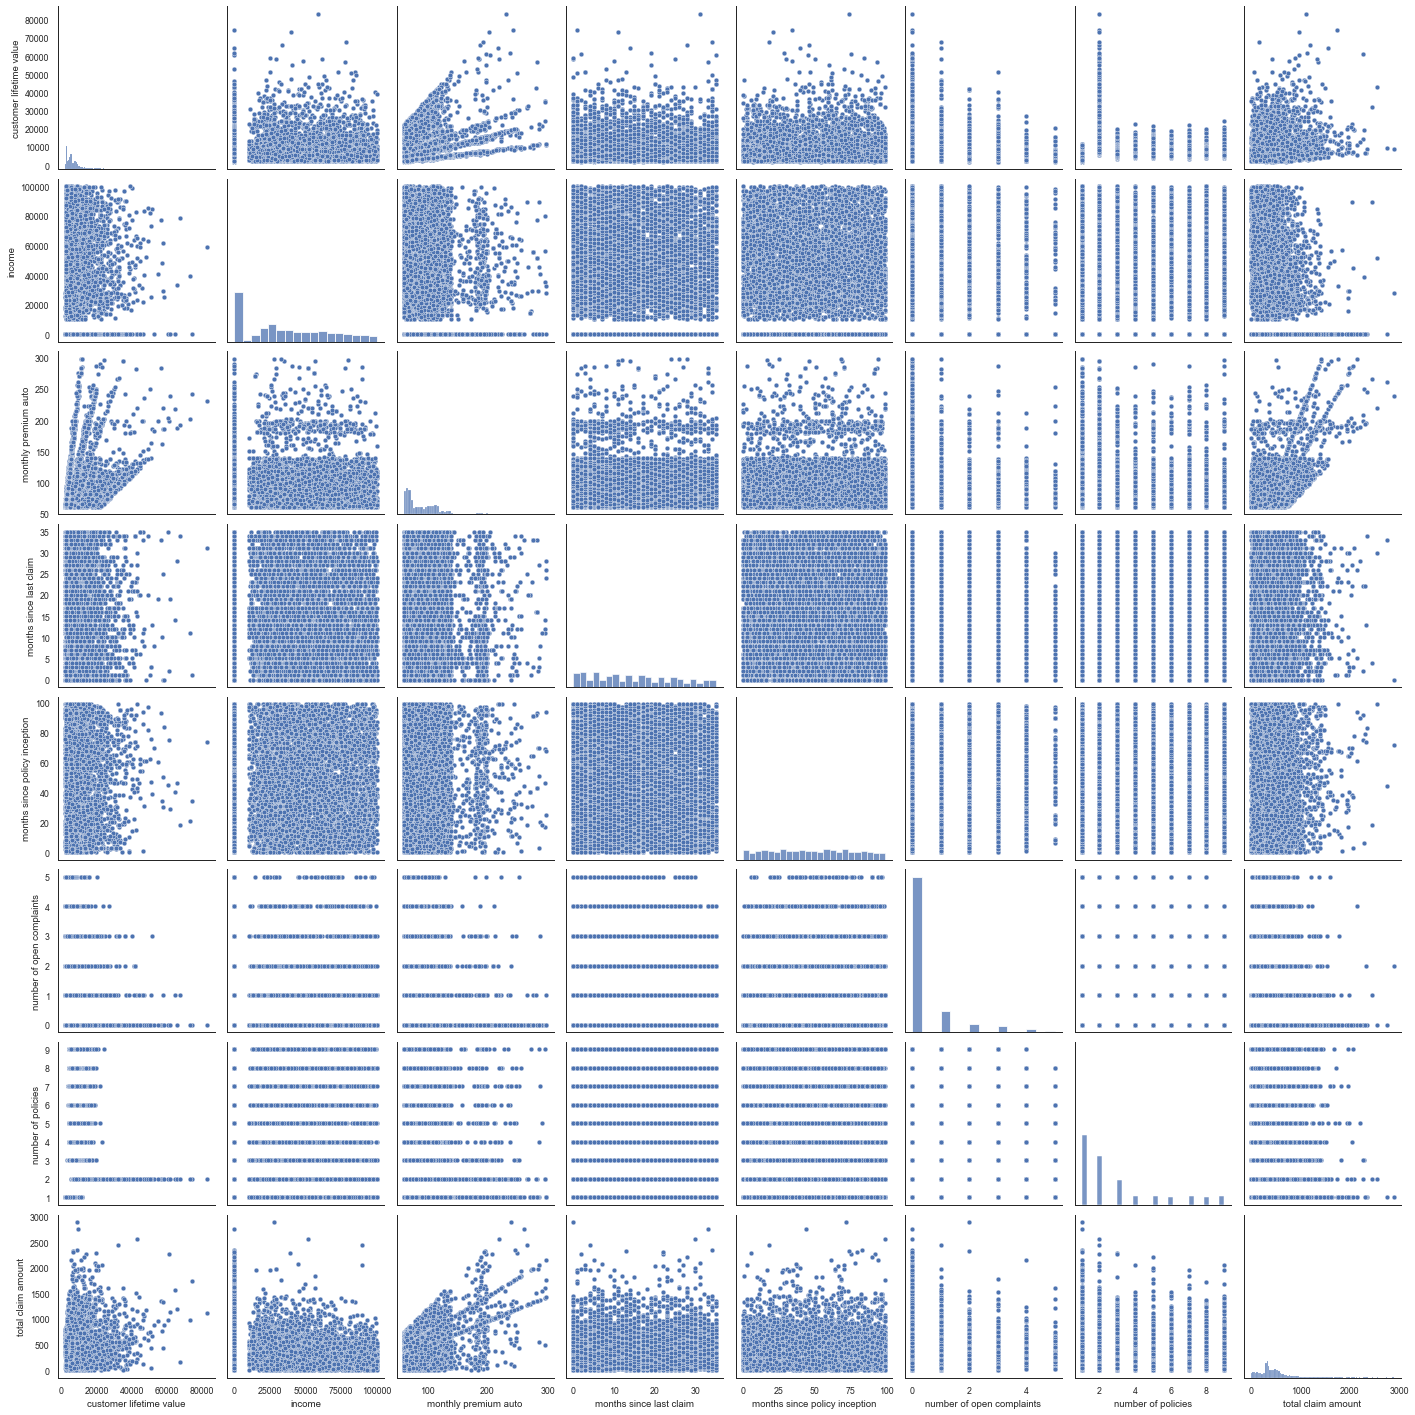

In [106]:
sns.pairplot(data=numerical)

plt.show()

### constructing histograms

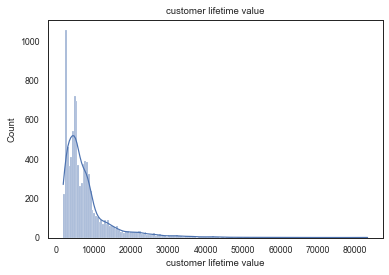

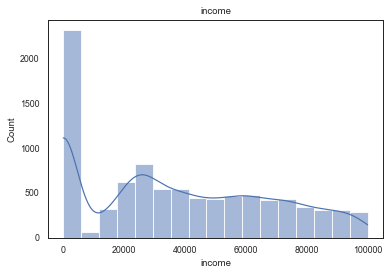

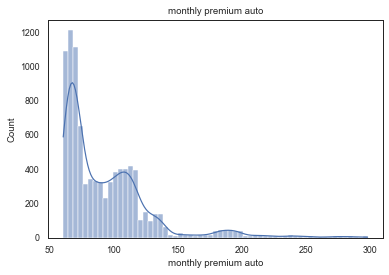

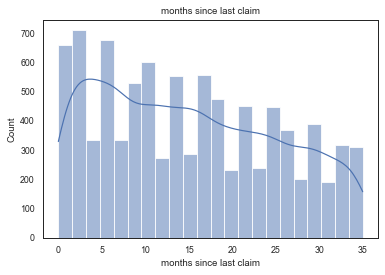

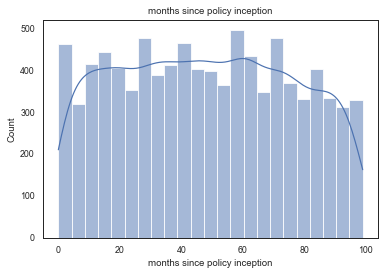

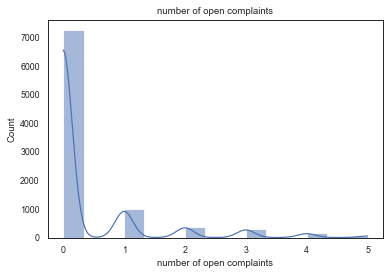

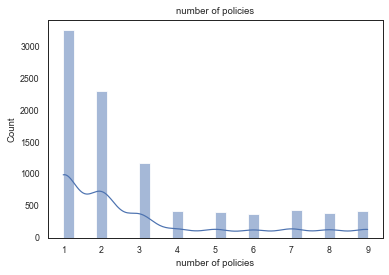

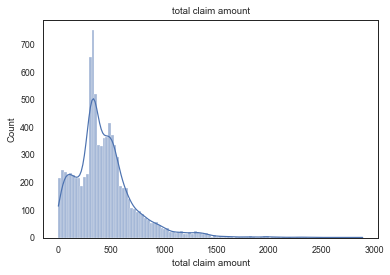

In [107]:
for col in numerical:
    num_all = sns.histplot(data=numerical,x=col,kde=True)
    plt.title(col)
    plt.show(num_all)



In [108]:
# sns.histplot(data=categoricals,x="state")
# plt.show()

# for col_cat in categoricals:
#     cat_all = sns.histplot(data=categoricals,x=col_cat)
#     plt.title(col_cat)
#     plt.show(cat_all)


### Do the distributions for different numerical variables look like a normal distribution?

No.

## multicollinearity between the features

In [109]:
numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly premium auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months since last claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months since policy inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number of open complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number of policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total claim amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [110]:
numerical.corr()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
customer lifetime value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly premium auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months since last claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months since policy inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number of open complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number of policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total claim amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


### dropping target variable (total_claim_amount) + creating a heatmap

In [111]:
# dropping target variable total_claim_amount

numerical_feat = numerical.drop(["total claim amount"], axis =1)

#numerical_feat.describe().T

In [112]:
# giving birth to the matrix
corr_matrix = numerical_feat.corr()
corr_matrix

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies
customer lifetime value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656
monthly premium auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233
months since last claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136
months since policy inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333
number of open complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498
number of policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000


In [113]:
# trimming values
for col in corr_matrix.columns:
    corr_matrix[col] = corr_matrix[col].apply(lambda x : round(x, 2))

<AxesSubplot:>

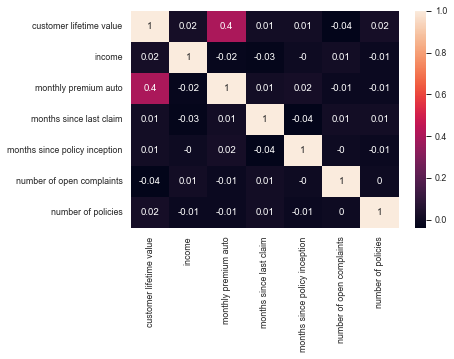

In [114]:
# heatmap without target variable
sns.heatmap(data=corr_matrix,
           annot = True)
# No value is > 0.9. Dropping any feature is not necessary.

<AxesSubplot:>

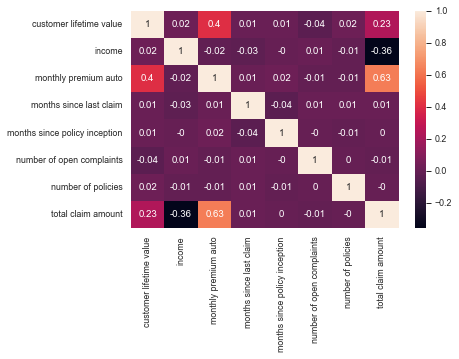

In [115]:
# heatmap with target variable

num_all = numerical.corr()

# rounding value in heatmap
for col in num_all:
    num_all[col] = num_all[col].apply(lambda x : round(x, 2))

sns.heatmap(data=num_all,
           annot=True)

# Start of round 5 <a class="anchor" id="round5"></a>

## X-y split

In [116]:
y_xysplit = file1['total claim amount']
X = file1.drop(['total claim amount'], axis = 1) 
#X.head()
X_cat = X.select_dtypes(include=np.object)
X_num = X.select_dtypes(include=np.number)

#X_cat.describe().T
#X_num.describe().Ttransformer = MinMaxScaler().fit(X_num)
X_normalized = transformer.transform(X_num)

#print(x_normalized.shape)

X_normalized

data_norm_minmax = pd.DataFrame(X_normalized, columns=X_num.columns)
data_norm_minmax.describe().T

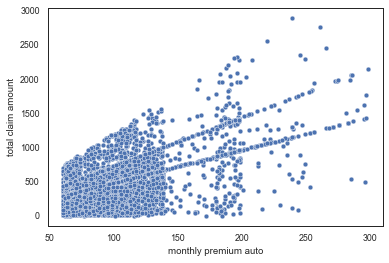

In [117]:
# a little bit of linear regression

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


# without regression line
sns.scatterplot(data=numerical,
                x="monthly premium auto",
                y="total claim amount")
plt.show()

In [118]:
# with regression line
lm = linear_model.LinearRegression()
lm.fit(X_num,y_xysplit)

print("lm.coef_: ", lm.coef_)
print("lm.intercept_ :", lm.intercept_)

lm.coef_:  [-6.74723453e-04 -3.29341526e-03  5.34254540e+00 -1.45721018e-01
 -1.02321926e-01 -1.37160695e+00  2.48565252e-01]
lm.intercept_ : 72.39096819184198


In [119]:
# index for column
X_num.columns.get_loc("monthly premium auto") 

2

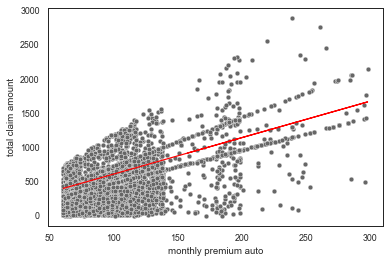

In [120]:
regression_line = lm.intercept_ + lm.coef_[2]*numerical['monthly premium auto'] # y = n + mx,

plt.plot(numerical['monthly premium auto'], regression_line, c = 'red')
sns.scatterplot(data=numerical,
                x='monthly premium auto',
                y='total claim amount',
               color= ".4")
plt.show()

In [121]:
print("r2 score: ",lm.score(X_num,y_xysplit)) # r2 = 1 best fit model
y_pred = lm.predict(X_num)
print("mean squared error: ",mean_squared_error(y_pred,y_xysplit))
print("rooted mean squared error: ",np.sqrt(mean_squared_error(y_pred,y_xysplit)))

r2 score:  0.5186628226558787
mean squared error:  40615.74326224916
rooted mean squared error:  201.53347925902824


## Normalize (numerical)

In [122]:
from sklearn.preprocessing import MinMaxScaler


X_num.head()


,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies
0,4809.216960,48029,61,7.0,52,0.0,9
1,2228.525238,0,64,3.0,26,0.0,1
2,14947.917300,22139,100,34.0,31,0.0,2
3,22332.439460,49078,97,10.0,3,0.0,2
6,5035.035257,37405,63,8.0,99,3.0,4


In [123]:
# dropping response rate - exists already in categorical data

X.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,Z,February
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,Z,January
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A,February
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A,January
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,Four-Door Car,Medsize,Z,February


In [124]:
transformer = MinMaxScaler().fit(X_num)
X_normalized = transformer.transform(X_num)

#print(x_normalized.shape)

X_normalized

data_norm_minmax = pd.DataFrame(X_normalized, columns=X_num.columns)
data_norm_minmax.describe().T

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,9134.0,0.074999,0.084382,0.0,0.025744,0.047677,0.086754,1.0
income,9134.0,0.376645,0.303857,0.0,0.000000,0.338959,0.623318,1.0
monthly premium auto,9134.0,0.135946,0.145181,0.0,0.029536,0.092827,0.202532,1.0
months since last claim,9134.0,0.431343,0.287807,0.0,0.171429,0.400000,0.657143,1.0
months since policy inception,9134.0,0.485501,0.281879,0.0,0.242424,0.484848,0.717172,1.0
number of open complaints,9134.0,0.076878,0.182077,0.0,0.000000,0.000000,0.000000,1.0
number of policies,9134.0,0.245771,0.298773,0.0,0.000000,0.125000,0.375000,1.0


In [125]:
# data_norm_corr = data_norm.corr()
# sns.heatmap(data=data_norm_corr, annot = True)

In [126]:
# for col in data_norm:
#     num_all = sns.scatterplot(data=data_norm,x=col,y = y)
#     plt.title(col)
#     plt.show(num_all)

# Start of round 6 <a class="anchor" id="round6"></a>

### One Hot/Label Encoding(categorical)

In [127]:
X_cat.head()

,customer,state,response,coverage,education,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type,month
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,Z,February
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,Z,January
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A,February
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A,January
6,IW72280,California,No,Basic,Doctor,Employed,F,Urban,Married,Corporate Auto,Corporate L2,Offer2,Branch,Four-Door Car,Medsize,Z,February


In [128]:
# dropping "costumer", "month"
# customer id is not neccesary
# month offers no real value

X_cat = X_cat.drop(["customer","month"], axis = 1)
X_cat

,state,response,coverage,education,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,Z
1,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,Z
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
6,California,No,Basic,Doctor,Employed,F,Urban,Married,Corporate Auto,Corporate L2,Offer2,Branch,Four-Door Car,Medsize,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,Arizona,No,Basic,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize,A
10904,Nevada,No,Basic,High School or Below,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Luxury SUV,Medsize,A
10906,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,Z


In [129]:
# encoding all columns
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(drop='first').fit(X_cat)
encoded = encoder.transform(X_cat).toarray()
cols = encoder.get_feature_names(input_features=X_cat.columns)
#cols
onehot_encoded = pd.DataFrame(encoded, columns=cols)
onehot_encoded.head()

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,...,sales channel_Call Center,sales channel_Web,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Medsize,vehicle size_Small,vehicle type_Z
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [130]:
# concatinating both numerical and categorical

X_wholeagain = pd.concat([data_norm_minmax, onehot_encoded], axis=1)
#X_wholeagain.describe().T

<AxesSubplot:>

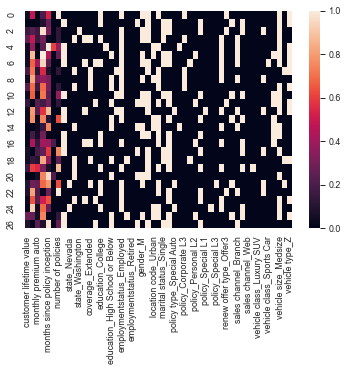

In [131]:
# heatmap art

sns.heatmap(data=X_wholeagain[:27])


<AxesSubplot:>

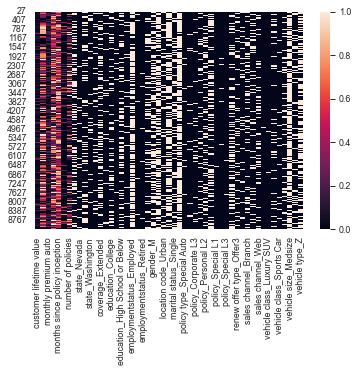

In [132]:
sns.heatmap(data=X_wholeagain[27:])

## Linear Regression

### Train-test split

In [134]:
# target

y_xysplit.head()
#X_wholeagain.head()

0    292.800000
1    744.924331
2    480.000000
3    484.013411
6    287.556107
Name: total claim amount, dtype: float64

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_wholeagain, y_xysplit, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7307, 51)
(1827, 51)
(7307,)
(1827,)


In [137]:
# train/fit the model
from sklearn import linear_model

lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [138]:
# lm.coef_


In [139]:
# finding the right index for lm.coef_
X_wholeagain.columns.get_loc("monthly premium auto") # highest correlation

2

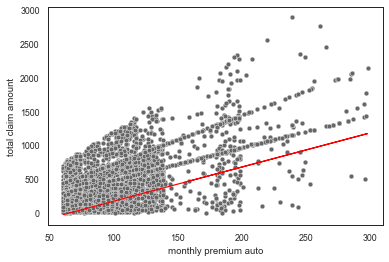

In [140]:
regression_line = lm.intercept_ + lm.coef_[2]*X_wholeagain['monthly premium auto'] # y = n + mx,

# highest correlation
plt.plot(file1['monthly premium auto'], regression_line, c = 'red')
sns.scatterplot(data=file1,
                x='monthly premium auto',
                y='total claim amount',
               color= ".4")
plt.show()

## Model Validation

### R2 Score

In [141]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error


In [142]:
# print("r2 score: ",lm.score(X_wholeagain,y)) # r2 = 1 best fit model
predictions_test = lm.predict(X_test)
print("r2 Score of test Data: ",r2_score(y_test, predictions_test))

predictions_train = lm.predict(X_train)
print("r2 Score of train Data: ",r2_score(y_train, predictions_train))

r2 Score of test Data:  0.7713416341117861
r2 Score of train Data:  0.7695196306886412


### MSE

In [144]:
y_pred = lm.predict(X_wholeagain)
print("mean squared error: ",mean_squared_error(y_pred,y_xysplit))

mean squared error:  19416.16133540057


### RMSE

In [145]:
print("rooted mean squared error: ",np.sqrt(mean_squared_error(y_pred,y_xysplit)))

rooted mean squared error:  139.34188650725443


### MAE

In [147]:
mae_test = mean_absolute_error(y_test, predictions_test)
print("mean absolute error of test data:", mae_test)

mae_train = mean_absolute_error(y_train, predictions_train)
print("mean absolute error of train data:", mae_train)

mean absolute error of test data: 96.76478338425486
mean absolute error of train data: 94.64427117238513


# Start of round 7 <a class="anchor" id="round7"></a>

### Improving linear regression model ?

In [148]:
X_num.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies
0,4809.216960,48029,61,7.0,52,0.0,9
1,2228.525238,0,64,3.0,26,0.0,1
2,14947.917300,22139,100,34.0,31,0.0,2
3,22332.439460,49078,97,10.0,3,0.0,2
6,5035.035257,37405,63,8.0,99,3.0,4


In [149]:
# testing standard scaler
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(X_num)
X_standardized = transformer.transform(X_num)
print(X_standardized.shape)
pd.DataFrame(X_standardized, columns=X_num.columns)

data_norm_stand = pd.DataFrame(X_standardized, columns=X_num.columns)
data_norm_stand.describe().T

(9134, 7)


,count,mean,std,min,25%,50%,75%,max
customer lifetime value,9134.0,3.476284e-18,1.000055,-0.888851,-0.583747,-0.323809,0.139322,10.962730
income,9134.0,3.462428e-16,1.000055,-1.239617,-1.239617,-0.124032,0.811851,2.051587
monthly premium auto,9134.0,-1.183881e-17,1.000055,-0.936442,-0.732989,-0.297020,0.458660,5.951875
months since last claim,9134.0,5.924269e-17,1.000055,-1.498803,-0.903134,-0.108908,0.784596,1.975934
months since policy inception,9134.0,1.270667e-16,1.000055,-1.722470,-0.862392,-0.002315,0.821926,1.825350
number of open complaints,9134.0,-1.273827e-16,1.000055,-0.422250,-0.422250,-0.422250,-0.422250,5.070242
number of policies,9134.0,-2.325464e-16,1.000055,-0.822648,-0.822648,-0.404247,0.432555,2.524561


In [150]:
X_wholeagain_stan_test = pd.concat([data_norm_stand, onehot_encoded], axis=1)
X_wholeagain_stan_test.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,state_California,state_Nevada,state_Oregon,...,sales channel_Call Center,sales channel_Web,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Medsize,vehicle size_Small,vehicle type_Z
0,-0.465131,0.341416,-0.936442,-0.803856,0.141031,-0.422250,2.524561,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.840745,-1.239617,-0.849248,-1.200968,-0.790719,-0.422250,-0.822648,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1.010536,-0.510839,0.197079,1.876656,-0.611536,-0.422250,-0.404247,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,2.085337,0.375947,0.109885,-0.506021,-1.614960,-0.422250,-0.404247,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.432263,-0.008308,-0.878312,-0.704577,1.825350,2.873245,0.432555,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [152]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_wholeagain_stan_test, y_xysplit, test_size=0.2, random_state=42)

print(X_train_2.shape)
print(X_test_2.shape)
print(y_train_2.shape)
print(y_test_2.shape)


lm_2 = linear_model.LinearRegression()
lm_2.fit(X_train_2,y_train_2)

(7307, 51)
(1827, 51)
(7307,)
(1827,)


LinearRegression()

In [155]:
print("Results using StandardScaler: ")
predictions_test_2 = lm_2.predict(X_test_2)
print("r2 Score of test Data: ",r2_score(y_test_2, predictions_test_2))

predictions_train_2 = lm_2.predict(X_train_2)
print("r2 Score of train Data: ",r2_score(y_train, predictions_train_2))

y_pred_2 = lm_2.predict(X_wholeagain_stan_test)
print("mean squared error: ",mean_squared_error(y_pred_2,y_xysplit))

print("rooted mean squared error: ",np.sqrt(mean_squared_error(y_pred_2,y_xysplit)))

mae_test_2 = mean_absolute_error(y_test, predictions_test_2)
print("mean absolute error of test data:", mae_test_2)

mae_train_2 = mean_absolute_error(y_train_2, predictions_train_2)
print("mean absolute error of test data:", mae_train_2)

results using StandardScaler: 
r2 Score of test Data:  0.7731870277435509
r2 Score of train Data:  0.7718398178468155
mean squared error:  19228.685047421877
rooted mean squared error:  138.66753422276562
mean absolute error of test data: 96.85951076754618
mean absolute error of test data: 94.55612461611754


In [ ]:
# adding comments for dropping columns in round 2